<a href="https://colab.research.google.com/github/julius904/seminar-react-nodejs-sm-ccs-2025/blob/main/ML_Workflow_sm_ccs_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Step 1️⃣: Import Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.decomposition import PCA

In [2]:
# Step 2️⃣: Load Dataset
iris = load_iris()

# Create a DataFrame
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target
df['species_name'] = df['species'].apply(lambda x: iris.target_names[x])

In [3]:
# Step 3️⃣: Exploratory Data Analysis (EDA)
print("🔍 Dataset Summary:")
print(df.describe())
print("\n🔍 Class Distribution:")
print(df['species_name'].value_counts())

🔍 Dataset Summary:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)     species  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  

🔍 Class Distribution:
species_name
setosa        50


In [5]:
# Step 4️⃣: Preprocessing
X = df[iris.feature_names]
y = df['species']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
# Step 5️⃣: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

In [12]:
# Step 6️⃣: Model Selection
model = LogisticRegression(max_iter=200)

In [13]:
# Step 7️⃣: Training
model.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [14]:
# Step 8️⃣: Evaluation
y_pred = model.predict(X_test)

print("\n📊 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\n📈 Classification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))


📊 Confusion Matrix:
[[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]

📈 Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127800 (\N{CHERRY BLOSSOM}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


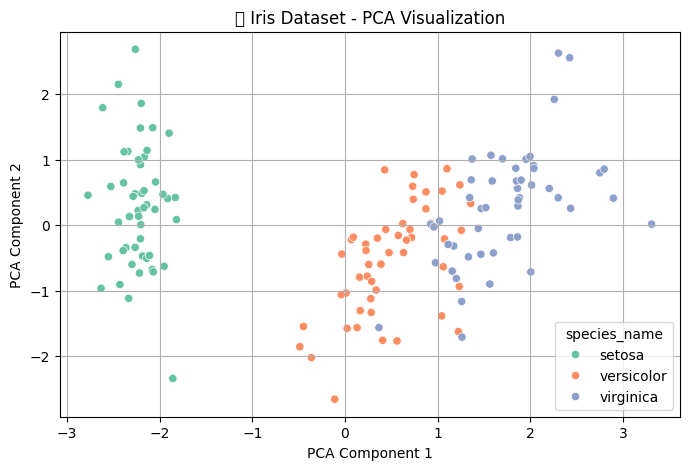

In [11]:
# Step 9️⃣: Visualization (PCA)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['species_name'], palette='Set2')
plt.title("🌸 Iris Dataset - PCA Visualization")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.show()